In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from imblearn.over_sampling import SMOTE

In [11]:
data = pd.read_csv("/Users/samirghumde/Desktop/creditcard.csv")
print(data.shape)
data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
print(data["Class"].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [13]:
X = data.drop("Class", axis=1)
y = data["Class"]

print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:",X_train.shape)
print("Testing samples:",X_test.shape)

Training samples: (227845, 30)
Testing samples: (56962, 30)


In [15]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score

lr =LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr= lr.predict(X_test_scaled)

print("Logistic Regression Results")
print(classification_report(y_test,y_pred_lr))
print("ROC-AUC:",roc_auc_score(y_test,y_pred_lr))

Logistic Regression Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.63      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.8162122227900727


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)

y_pred_rf =rf.predict(X_test)

print("Random Forest Results (Imbalanced)")
print(classification_report(y_test,y_pred_rf))
print("ROC-AUC:",roc_auc_score(y_test,y_pred_rf))

Random Forest Results (Imbalanced)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9081193007591333


In [19]:
from imblearn.over_sampling import SMOTE

smote =SMOTE(random_state=42)

X_train_smote,y_train_smote = smote.fit_resample(
    X_train_scaled, y_train
)

print("After SMOTE:", np.bincount(y_train_smote))

After SMOTE: [227451 227451]


In [23]:
rf_smote = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = rf_smote.predict(X_test_scaled)

print("Proposed Model (RF + SMOTE)")
print(classification_report(y_test, y_pred_smote))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_smote))

Proposed Model (RF + SMOTE)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9131597912096746


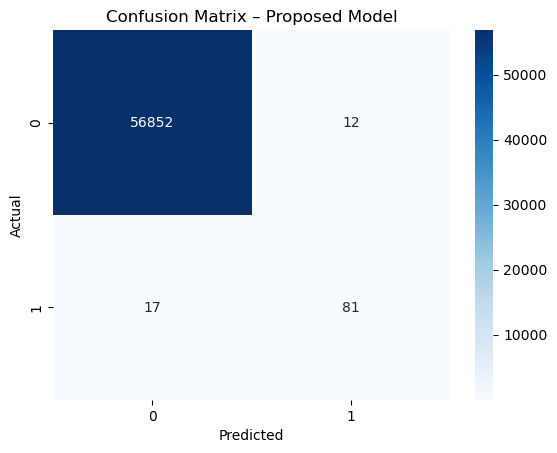

In [22]:
cm =confusion_matrix(y_test,y_pred_smote)

sns.heatmap(cm, annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix –Proposed Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [27]:
results= pd.DataFrame({
    "Model": ["Logistic Regression","Random Forest","RF +SMOTE"],
    "ROC-AUC": [
        roc_auc_score(y_test,y_pred_lr),
        roc_auc_score(y_test,y_pred_rf),
        roc_auc_score(y_test,y_pred_smote)
    ]
})

print(results)

                 Model   ROC-AUC
0  Logistic Regression  0.816212
1        Random Forest  0.908119
2           RF + SMOTE  0.913160
